# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
#Verificando as colunas do dataframe. 
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [4]:
#Verificando as informações do dataframe. 
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [5]:
#Criando um dataframe para o exercício.
sinasc_1 = sinasc_raw[['munResLat', 'QTDPARTNOR', 'QTDPARTCES']]
sinasc_1.head()

,munResLat,QTDPARTNOR,QTDPARTCES
0,-11.93554,0.0,0.0
1,-11.93554,0.0,1.0
2,-11.93554,1.0,1.0
3,-12.13178,0.0,0.0
4,-11.93554,0.0,1.0


In [6]:
#Verificando número de dados faltantes
sinasc_1.isna().sum()

munResLat        1
QTDPARTNOR    1879
QTDPARTCES    1791
dtype: int64

In [7]:
#Verificando número de linhas e colunas no novo dataframe.

sinasc_1.shape

(27028, 3)

In [8]:
#Retirando dados faltantes
sinasc_1 = sinasc_1.dropna()

In [9]:
#Reavaliando  número de dados faltantes
sinasc_1.isna().sum()

munResLat     0
QTDPARTNOR    0
QTDPARTCES    0
dtype: int64

In [10]:
#Verificando número de linhas e colunas no dataframe depois da retirada de dados faltantes.
sinasc_1.shape

(24830, 3)

In [11]:
#Criando as faixas de latitude e realizando as operações solicitadas.
faixas_lat = pd.cut(sinasc_1['munResLat'], bins=[-np.inf, -10.5, np.inf], labels=['Abaixo de -10.5', 'Acima de -10.5'])
grouped_lat = sinasc_1.groupby(faixas_lat)
resultado_exercicio1 = grouped_lat.agg({
    'QTDPARTNOR': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'QTDPARTCES': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})
resultado_exercicio1
#print(resultado_exercicio1)

QTDPARTNOR                                                  \
                       sum      mean  min   max median       std       var   
munResLat                                                                    
Abaixo de -10.5     5694.0  0.444983  0.0  40.0    0.0  1.054967  1.112956   
Acima de -10.5      8201.0  0.681486  0.0  30.0    0.0  1.216187  1.479110   

                QTDPARTCES                                                  
                       sum      mean  min   max median       std       var  
munResLat                                                                   
Abaixo de -10.5     7043.0  0.550406  0.0  12.0    0.0  0.752980  0.566978  
Acima de -10.5      5552.0  0.461359  0.0  12.0    0.0  0.726127  0.527261

In [12]:
#Criando as faixas de latitude e realizando as operações solicitadas.
faixas_lat = pd.cut(sinasc_1['munResLat'], bins=[-np.inf, -10.5, np.inf], labels=['Abaixo de -10.5', 'Acima de -10.5'])
grouped_lat = sinasc_1.groupby(faixas_lat)
resultado_exercicio1 = grouped_lat.agg({
    'QTDPARTNOR': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'QTDPARTCES': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})
#resultado_exercicio1
print(resultado_exercicio1)

                QTDPARTNOR                                                  \
                       sum      mean  min   max median       std       var   
munResLat                                                                    
Abaixo de -10.5     5694.0  0.444983  0.0  40.0    0.0  1.054967  1.112956   
Acima de -10.5      8201.0  0.681486  0.0  30.0    0.0  1.216187  1.479110   

                QTDPARTCES                                                  
                       sum      mean  min   max median       std       var  
munResLat                                                                   
Abaixo de -10.5     7043.0  0.550406  0.0  12.0    0.0  0.752980  0.566978  
Acima de -10.5      5552.0  0.461359  0.0  12.0    0.0  0.726127  0.527261  


### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [13]:
#Criando 2 faixas de área dos municípios.
faixas_area =pd.cut(sinasc_raw['munResArea'],bins=[-np.inf,3000,np.inf],labels=['Abaixo de 3000','Acima de 3000'])

#Aplicando o groupby usando as faixas como chave.
grouped_area = sinasc_raw.groupby(faixas_area)

#Realizando as operações
resultado_exercicio2 = grouped_area.agg({
    'QTDFILVIVO':['sum','mean','min','max','median','std','var'],
    'QTDFILMORT':['sum','mean','min','max','median','std','var'] 
})

resultado_exercicio2

QTDFILVIVO                                                  \
                      sum      mean  min   max median       std       var   
munResArea                                                                  
Abaixo de 3000     4773.0  0.924284  0.0  30.0    1.0  1.075442  1.156575   
Acima de 3000     22053.0  1.086890  0.0  14.0    1.0  1.191750  1.420268   

               QTDFILMORT                                                  
                      sum      mean  min   max median       std       var  
munResArea                                                                 
Abaixo de 3000     1260.0  0.244803  0.0   4.0    0.0  0.551215  0.303838  
Acima de 3000      5383.0  0.272116  0.0  28.0    0.0  0.629081  0.395743

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [14]:
#Analisando a variável munResAlt
sinasc_raw['munResAlt'].mean()

179.11199911199913

In [15]:
#Criando 2 faixas na variável munResAlt 
faixas_alt= pd.cut(sinasc_raw['munResAlt'],bins = [-np.inf,179.11,np.inf],labels = ['Abaixo de 179.11','Acima de 179.11'])

#Aplicando o groupby nas faixas.
grouped_alt = sinasc_raw.groupby(faixas_alt)

#Realizando as operações
resultado_exercicio3 = grouped_alt.agg({
    'APGAR1':['sum','mean','min','max','median','std','var'],
    'APGAR5':['sum','mean','min','max','median','std','var']
})

resultado_exercicio3

APGAR1                                                  \
                       sum      mean  min   max median       std       var   
munResAlt                                                                    
Abaixo de 179.11  155554.0  8.154862  0.0  10.0    8.0  0.996443  0.992898   
Acima de 179.11    63595.0  8.095087  0.0  10.0    8.0  0.955134  0.912281   

                    APGAR5                                                  
                       sum      mean  min   max median       std       var  
munResAlt                                                                   
Abaixo de 179.11  175382.0  9.196749  0.0  10.0    9.0  0.779604  0.607782  
Acima de 179.11    71757.0  9.136364  0.0  10.0    9.0  0.815062  0.664326

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

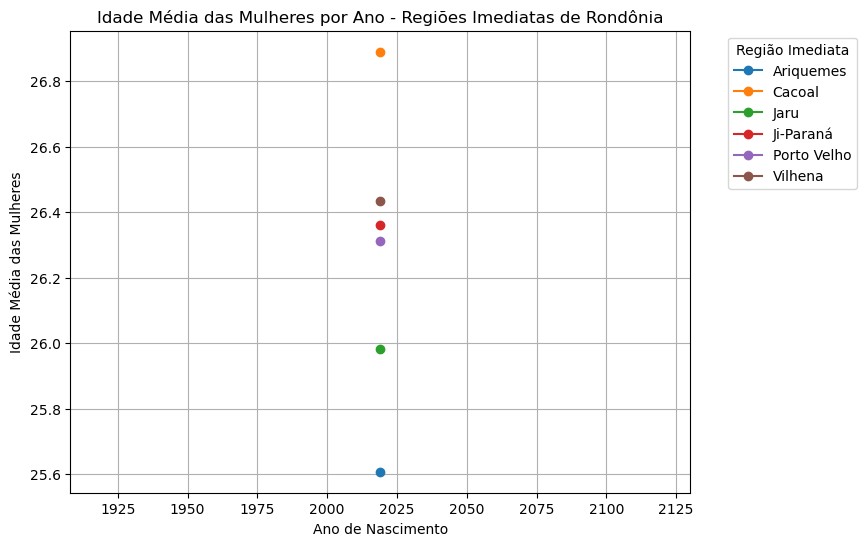

In [17]:
# Municípios das regiões imediatas de Rondônia
municipios_reg_imediatas = [
    'Porto Velho', 'Ariquemes', 'Jaru', 'Ji-Paraná', 'Cacoal', 'Vilhena'
]

# Filtrando o DataFrame para incluir apenas os municípios das regiões imediatas
sinasc_imediatas = sinasc_raw[sinasc_raw['munResNome'].isin(municipios_reg_imediatas)].copy()

# Convertendo a coluna 'DTNASC' para o tipo de data
sinasc_imediatas['DTNASC'] = pd.to_datetime(sinasc_imediatas['DTNASC'], format='%Y-%m-%d')

# Calculando a idade média das mulheres para cada ano e região imediata
sinasc_imediatas['IDADEMAE'] = pd.to_numeric(sinasc_imediatas['IDADEMAE'], errors='coerce')
idade_media_por_ano_regiao = sinasc_imediatas.groupby([sinasc_imediatas['DTNASC'].dt.year, 'munResNome'])['IDADEMAE'].mean().unstack()

# Plotando o gráfico
plt.figure(figsize=(8, 6))
for regiao in idade_media_por_ano_regiao.columns:
    plt.plot(idade_media_por_ano_regiao.index, idade_media_por_ano_regiao[regiao], marker='o', label=regiao)

plt.title('Idade Média das Mulheres por Ano - Regiões Imediatas de Rondônia')
plt.xlabel('Ano de Nascimento')
plt.ylabel('Idade Média das Mulheres')
plt.grid(True)
plt.legend(title='Região Imediata', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [18]:
# Dados do IDH por município
dados_idh = {
    'Município': [
        'Porto Velho', 'Vilhena', 'Cacoal', 'Ji-Paraná', 'Pimenta Bueno', 'Ariquemes', 'Rolim de Moura',
        'Cerejeiras', 'Jaru', 'Colorado do Oeste', 'Ouro Preto do Oeste', 'Espigão d\'Oeste', 'Santa Luzia d\'Oeste',
        'Pimenteiras do Oeste', 'Presidente Médici', 'Castanheiras', 'Guajará-Mirim', 'Chupinguaia', 'Cabixi',
        'Candeias do Jamari', 'São Felipe d\'Oeste', 'Cacaulândia', 'São Miguel do Guaporé', 'Mirante da Serra',
        'Alvorada d\'Oeste', 'Teixeirópolis', 'Nova Brasilândia d\'Oeste', 'Rio Crespo', 'Primavera de Rondônia',
        'Alta Floresta d\'Oeste', 'Ministro Andreazza', 'Novo Horizonte do Oeste', 'Vale do Paraíso', 'Alto Paraíso',
        'Parecis', 'Buritis', 'Itapuã do Oeste', 'Corumbiara', 'Cujubim', 'Costa Marques', 'São Francisco do Guaporé',
        'Urupá', 'Monte Negro', 'Seringueiras', 'Governador Jorge Teixeira', 'Machadinho d\'Oeste',
        'Campo Novo de Rondônia', 'Alto Alegre dos Parecis', 'Theobroma', 'Nova União', 'Nova Mamoré', 'Vale do Anari'
    ],
    'IDH municipal': [
        0.736, 0.731, 0.718, 0.714, 0.710, 0.702, 0.700, 0.692, 0.689, 0.685, 0.682, 0.672, 0.670, 0.665, 0.664,
        0.658, 0.657, 0.652, 0.650, 0.649, 0.649, 0.649, 0.646, 0.646, 0.643, 0.643, 0.643, 0.643, 0.643, 0.643,
        0.641, 0.641, 0.638, 0.634, 0.627, 0.625, 0.617, 0.616, 0.614, 0.613, 0.612, 0.611, 0.611, 0.609, 0.607,
        0.598, 0.596, 0.596, 0.593, 0.592, 0.589, 0.587, 0.587, 0.584
    ]
}
dados_idh

{'Município': ['Porto Velho',
  'Vilhena',
  'Cacoal',
  'Ji-Paraná',
  'Pimenta Bueno',
  'Ariquemes',
  'Rolim de Moura',
  'Cerejeiras',
  'Jaru',
  'Colorado do Oeste',
  'Ouro Preto do Oeste',
  "Espigão d'Oeste",
  "Santa Luzia d'Oeste",
  'Pimenteiras do Oeste',
  'Presidente Médici',
  'Castanheiras',
  'Guajará-Mirim',
  'Chupinguaia',
  'Cabixi',
  'Candeias do Jamari',
  "São Felipe d'Oeste",
  'Cacaulândia',
  'São Miguel do Guaporé',
  'Mirante da Serra',
  "Alvorada d'Oeste",
  'Teixeirópolis',
  "Nova Brasilândia d'Oeste",
  'Rio Crespo',
  'Primavera de Rondônia',
  "Alta Floresta d'Oeste",
  'Ministro Andreazza',
  'Novo Horizonte do Oeste',
  'Vale do Paraíso',
  'Alto Paraíso',
  'Parecis',
  'Buritis',
  'Itapuã do Oeste',
  'Corumbiara',
  'Cujubim',
  'Costa Marques',
  'São Francisco do Guaporé',
  'Urupá',
  'Monte Negro',
  'Seringueiras',
  'Governador Jorge Teixeira',
  "Machadinho d'Oeste",
  'Campo Novo de Rondônia',
  'Alto Alegre dos Parecis',
  'Theobrom

In [19]:
#Conferindo número de elementos na lista
min_length = min(len(dados_idh['Município']), len(dados_idh['IDH municipal']))
dados_idh['Município'] = dados_idh['Município'][:min_length]
dados_idh['IDH municipal'] = dados_idh['IDH municipal'][:min_length]

In [20]:
# Criar um DataFrame com os dados de IDH
df_idh = pd.DataFrame(dados_idh)
df_idh

,Município,IDH municipal
0,Porto Velho,0.736
1,Vilhena,0.731
2,Cacoal,0.718
3,Ji-Paraná,0.714
4,Pimenta Bueno,0.710
5,Ariquemes,0.702
6,Rolim de Moura,0.700
7,Cerejeiras,0.692
8,Jaru,0.689
9,Colorado do Oeste,0.685


In [21]:
# Escolher os intervalos para as faixas de IDH
intervalos = [0, 0.5, 0.6, 0.7, 0.8, 1]

# Escolher os labels para as faixas de IDH
labels = ['Muito Baixo', 'Baixo', 'Médio', 'Alto', 'Muito Alto']


# Criar uma nova coluna no DataFrame com as faixas de IDH
df_idh['Faixa IDH'] = pd.cut(df_idh['IDH municipal'], bins=intervalos, labels=labels, right=False)

# Cria agrupamentos utilizando as faixas de IDH como chave
agrupamentos = df_idh.groupby('Faixa IDH')

# Mostrar os agrupamentos
for faixa, grupo in agrupamentos:
    print(f'Faixa de IDH: {faixa}')
    print(grupo[['Município', 'IDH municipal']])

Faixa de IDH: Muito Baixo
Empty DataFrame
Columns: [Município, IDH municipal]
Index: []
Faixa de IDH: Baixo
                  Município  IDH municipal
45       Machadinho d'Oeste          0.598
46   Campo Novo de Rondônia          0.596
47  Alto Alegre dos Parecis          0.596
48                Theobroma          0.593
49               Nova União          0.592
50              Nova Mamoré          0.589
51            Vale do Anari          0.587
Faixa de IDH: Médio
                    Município  IDH municipal
7                  Cerejeiras          0.692
8                        Jaru          0.689
9           Colorado do Oeste          0.685
10        Ouro Preto do Oeste          0.682
11            Espigão d'Oeste          0.672
12        Santa Luzia d'Oeste          0.670
13       Pimenteiras do Oeste          0.665
14          Presidente Médici          0.664
15               Castanheiras          0.658
16              Guajará-Mirim          0.657
17                Chupinguaia    

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [25]:
# Dados do IFDM por município
dados_ifdm = {
    'Município': ['Ariquemes', 'Vilhena', 'Pimenta Bueno', 'Porto Velho', 'Ji-Paraná', 'Cacoal', 'Santa Luzia d\'Oeste', 'Rolim de Moura', 'Chupinguaia', 'São Miguel do Guaporé', 'Pimenteiras do Oeste', 'Teixeirópolis', 'Colorado do Oeste', 'Jaru', 'Rio Crespo', 'Primavera de Rondônia', 'Alta Floresta d\'Oeste', 'Ouro Preto do Oeste', 'São Francisco do Guaporé', 'Candeias do Jamari', 'Buritis', 'São Felipe d\'Oeste', 'Presidente Médici', 'Cerejeiras', 'Monte Negro', 'Urupá', 'Espigão d\'Oeste', 'Seringueiras', 'Alvorada d\'Oeste', 'Itapuã do Oeste', 'Cabixi', 'Novo Horizonte do Oeste', 'Nova Brasilândia d\'Oeste', 'Vale do Paraíso', 'Corumbiara', 'Alto Paraíso', 'Cacaulândia', 'Vale do Anari', 'Ministro Andreazza', 'Costa Marques', 'Nova União', 'Guajará-Mirim', 'Mirante da Serra', 'Parecis', 'Castanheiras', 'Theobroma', 'Machadinho d\'Oeste', 'Campo Novo de Rondônia', 'Nova Mamoré', 'Cujubim', 'Alto Alegre dos Parecis', 'Governador Jorge Teixeira'],
    'IFDM': [0.7746, 0.7465, 0.7383, 0.7257, 0.7117, 0.7111, 0.6850, 0.6785, 0.6766, 0.6699, 0.6501, 0.6500, 0.6473, 0.6450, 0.6430, 0.6384, 0.6337, 0.6261, 0.6214, 0.6199, 0.6199, 0.6153, 0.6140, 0.6137, 0.6016, 0.6006, 0.5973, 0.5922, 0.5919, 0.5903, 0.5887, 0.5858, 0.5857, 0.5818, 0.5759, 0.5735, 0.5721, 0.5710, 0.5657, 0.5626, 0.5571, 0.5541, 0.5519, 0.5502, 0.5430, 0.5405, 0.5322, 0.5272, 0.5084, 0.5055, 0.5046, 0.4562]
}
#Conferindo o número de elementos na lista
min_length = min (len(dados_ifdm['Município']),len(dados_ifdm['IFDM']))
dados_ifdm['Município']= dados_ifdm['Município'][:min_length]
dados_ifdm['IFDM']= dados_ifdm ['IFDM'][:min_length] 

#Criando um Dataframe com os dados de IFDM
df_ifdm = pd.DataFrame(dados_ifdm)
df_ifdm

,Município,IFDM
0,Ariquemes,0.7746
1,Vilhena,0.7465
2,Pimenta Bueno,0.7383
3,Porto Velho,0.7257
4,Ji-Paraná,0.7117
5,Cacoal,0.7111
6,Santa Luzia d'Oeste,0.6850
7,Rolim de Moura,0.6785
8,Chupinguaia,0.6766
9,São Miguel do Guaporé,0.6699


In [27]:
#Escolher os intervalos para as faixas de IFDM
intervalos = [0, 0.4, 0.6, 0.8, 1]

#Escolher os labels para as faixas de IFDM
labels = ['Desenvolvimento baixo', 'Desenvolvimento regular', 'Desenvolvimento moderado', 'Desenvolvimento alto']

# Criar uma nova coluna no DataFrame com as faixas de IFDM
df_ifdm['Faixa IFDM'] = pd.cut(df_ifdm['IFDM'], bins=intervalos, labels=labels, right=False)

# Criar agrupamentos utilizando as faixas de IFDM como chave
agrupamentos = df_ifdm.groupby('Faixa IFDM')

# Mostrar os agrupamentos
for faixa, grupo in agrupamentos:
    print(f'Faixa de IFDM: {faixa}')
    print(grupo[['Município', 'IFDM']])

Faixa de IFDM: Desenvolvimento baixo
Empty DataFrame
Columns: [Município, IFDM]
Index: []
Faixa de IFDM: Desenvolvimento regular
                    Município    IFDM
26            Espigão d'Oeste  0.5973
27               Seringueiras  0.5922
28           Alvorada d'Oeste  0.5919
29            Itapuã do Oeste  0.5903
30                     Cabixi  0.5887
31    Novo Horizonte do Oeste  0.5858
32   Nova Brasilândia d'Oeste  0.5857
33            Vale do Paraíso  0.5818
34                 Corumbiara  0.5759
35               Alto Paraíso  0.5735
36                Cacaulândia  0.5721
37              Vale do Anari  0.5710
38         Ministro Andreazza  0.5657
39              Costa Marques  0.5626
40                 Nova União  0.5571
41              Guajará-Mirim  0.5541
42           Mirante da Serra  0.5519
43                    Parecis  0.5502
44               Castanheiras  0.5430
45                  Theobroma  0.5405
46         Machadinho d'Oeste  0.5322
47     Campo Novo de Rondônia  0.52

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [28]:
# Dados do PIB por município
dados_pib = {
    'Município': ['Porto Velho', 'Ji-Paraná', 'Vilhena', 'Ariquemes', 'Cacoal', 'Jaru', 'Rolim de Moura', 'Pimenta Bueno', 'Guajará-Mirim', 'Ouro Preto do Oeste', 'Buritis', 'Machadinho do Oeste', 'Espigão d\'Oeste', 'São Miguel do Guaporé', 'Candeias do Jamari', 'Nova Mamoré', 'Cerejeiras', 'Alta Floresta do Oeste', 'Presidente Médici', 'Cujubim', 'Nova Brasilândia do Oeste', 'Alto Paraíso', 'São Francisco do Guaporé', 'Colorado do Oeste', 'Monte Negro', 'Alto Alegre dos Parecis', 'Campo Novo de Rondônia', 'Alvorada do Oeste', 'Chupinguaia', 'Corumbiara', 'Ministro Andreazza', 'Urupá', 'Costa Marques', 'Seringueiras', 'Mirante da Serra', 'Governador Jorge Teixeira', 'Theobroma', 'Santa Luzia do Oeste', 'Novo Horizonte do Oeste', 'Itapuã do Oeste', 'Vale do Paraíso', 'Cacaulândia', 'Cabixi', 'Vale do Anari', 'Rio Crespo', 'Nova União', 'Parecis', 'Pimenteiras do Oeste', 'Teixeirópolis', 'São Felipe do Oeste', 'Castanheiras', 'Primavera de Rondônia'],
    'PIB': [17912070000, 3783972000, 2831175000, 2579830000, 2261644000, 1500890000, 1283434000, 1164877000, 893000000, 834000000, 726000000, 633000000, 625000000, 616000000, 548000000, 529000000, 507000000, 496000000, 428000000, 385000000, 360000000, 358000000, 353000000, 335000000, 219152000, 213410000, 208821000, 204098000, 190331000, 188218000, 174633000, 172143000, 171878000, 169429000, 163955000, 148027000, 140601000, 135934000, 129399000, 129351000, 116742000, 116635000, 113031000, 105208000, 76854000, 92346000, 80759000, 76756000, 72089000, 72084000, 59779000, 52908000]
}

#Conferindo o número de elementos na lista
min_length = min(len(dados_pib['Município']), len(dados_pib['PIB']))
dados_pib['Município'] = dados_pib['Município'][:min_length]
dados_pib['PIB'] = dados_pib['PIB'][:min_length]

# Criar um DataFrame com os dados de PIB
df_pib = pd.DataFrame(dados_pib)
df_pib

,Município,PIB
0,Porto Velho,17912070000
1,Ji-Paraná,3783972000
2,Vilhena,2831175000
3,Ariquemes,2579830000
4,Cacoal,2261644000
5,Jaru,1500890000
6,Rolim de Moura,1283434000
7,Pimenta Bueno,1164877000
8,Guajará-Mirim,893000000
9,Ouro Preto do Oeste,834000000


In [29]:
# Colocando os dados do PIB em ordem para definir os intervalos das faixas
df_pib.sort_values(by='PIB', inplace=True)

# Escolher os intervalos para as faixas de PIB
intervalos_pib = [0, 100_000_000, 200_000_000, 300_000_000, 500_000_000, 1_000_000_000, float('inf')]

# Escolher os labels para as faixas de PIB
labels_pib = ['Até 100 Milhões', 'Acima de 100 Milhões e até 200 Milhões', 'Acima de 200 Milhões e até 300 Milhões', 'Acima de 300 Milhões e até 500 Milhões', 'Acima de 500 Milhões e até 1 Bilhão', 'Acima de 1 Bilhão']

# Criar nova coluna no DataFrame com as faixas de PIB
df_pib['Faixa PIB'] = pd.cut(df_pib['PIB'], bins=intervalos_pib, labels=labels_pib, right=False)

# Criar agrupamentos usando as faixas de PIB como chave
agrupamentos_pib = df_pib.groupby('Faixa PIB')

# Mostrar os agrupamentos
for faixa, grupo in agrupamentos_pib:
    print(f'Faixa de PIB: {faixa}')
    print(grupo[['Município', 'PIB']])

Faixa de PIB: Até 100 Milhões
                Município       PIB
51  Primavera de Rondônia  52908000
50           Castanheiras  59779000
49    São Felipe do Oeste  72084000
48          Teixeirópolis  72089000
47   Pimenteiras do Oeste  76756000
44             Rio Crespo  76854000
46                Parecis  80759000
45             Nova União  92346000
Faixa de PIB: Acima de 100 Milhões e até 200 Milhões
                    Município        PIB
43              Vale do Anari  105208000
42                     Cabixi  113031000
41                Cacaulândia  116635000
40            Vale do Paraíso  116742000
39            Itapuã do Oeste  129351000
38    Novo Horizonte do Oeste  129399000
37       Santa Luzia do Oeste  135934000
36                  Theobroma  140601000
35  Governador Jorge Teixeira  148027000
34           Mirante da Serra  163955000
33               Seringueiras  169429000
32              Costa Marques  171878000
31                      Urupá  172143000
30         Ministro

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

In [30]:
avaliacao= sinasc_raw[['munResNome','APGAR1','PESO']]
avaliacao.head()

,munResNome,APGAR1,PESO
0,Alta Floresta D'Oeste,9.0,3685
1,Alta Floresta D'Oeste,8.0,3055
2,Alta Floresta D'Oeste,8.0,3460
3,Alto Alegre dos Parecis,9.0,2982
4,Alta Floresta D'Oeste,8.0,3310


In [35]:
funcoes= avaliacao.groupby('munResNome').describe()
funcoes

APGAR1                                           \
                            count      mean       std  min  25%  50%   75%   
munResNome                                                                   
Alta Floresta D'Oeste       366.0  8.202186  0.886795  2.0  8.0  8.0  9.00   
Alto Alegre dos Parecis     154.0  8.220779  0.872580  3.0  8.0  8.0  9.00   
Alto Paraíso                226.0  8.119469  1.090921  2.0  8.0  8.0  9.00   
Alvorada D'Oeste            205.0  7.941463  0.921682  3.0  8.0  8.0  8.00   
Ariquemes                  1729.0  7.997108  1.179735  0.0  8.0  8.0  9.00   
Buritis                     583.0  8.528302  1.070763  0.0  8.0  9.0  9.00   
Cabixi                       80.0  8.237500  0.799426  5.0  8.0  8.0  9.00   
Cacaulândia                  75.0  7.986667  1.108851  4.0  8.0  8.0  9.00   
Cacoal                     1373.0  8.126001  0.806859  1.0  8.0  8.0  9.00   
Campo Novo de Rondônia      166.0  8.319277  1.201207  2.0  8.0  9.0  9.00   
Candeias do Jamari          332.0  8.262048  0.869423  3.0  8.0  8.0  9.00   
Castanheiras                 32.0  8.000000  1.077632  3.0  8.0  8.0  8.25   
Cerejeiras                  236.0  8.186441  0.988867  2.0  8.0  8.0  9.00   
Chupinguaia                 160.0  8.187500  0.710987  5.0  8.0  8.0  9.00   
Colorado do Oeste           214.0  8.126168  0.876381  0.0  8.0  8.0  9.00   
Corumbiara                  127.0  8.251969  0.825857  3.0  8.0  8.0  9.00   
Costa Marques               232.0  7.711207  1.168954  2.0  7.0  8.0  8.00   
Cujubim                     205.0  7.936585  1.213033  1.0  8.0  8.0  9.00   
Espigão D'Oeste             448.0  7.848214  0.973564  1.0  8.0  8.0  8.00   
Governador Jorge Teixeira   112.0  8.053571  0.582620  5.0  8.0  8.0  8.00   
Guajará-Mirim               767.0  8.217731  0.923043  0.0  8.0  8.0  9.00   
Itapuã do Oeste             108.0  8.194444  1.063044  1.0  8.0  8.0  9.00   
Jaru                        880.0  8.062500  0.780568  1.0  8.0  8.0  8.00   
Ji-Paraná                  2182.0  7.990834  0.977467  0.0  8.0  8.0  8.00   
Machadinho D'Oeste          497.0  7.766600  1.225506  1.0  8.0  8.0  8.00   
Ministro Andreazza           84.0  8.059524  0.935913  4.0  8.0  8.0  9.00   
Mirante da Serra            164.0  8.012195  1.044928  2.0  8.0  8.0  9.00   
Monte Negro                 199.0  8.025126  1.394206  0.0  8.0  8.0  9.00   
Município ignorado - RO       1.0  9.000000       NaN  9.0  9.0  9.0  9.00   
Nova Brasilândia D'Oeste    261.0  7.593870  1.197674  0.0  7.0  8.0  8.00   
Nova Mamoré                 431.0  8.248260  0.876616  0.0  8.0  8.0  9.00   
Nova União                  104.0  7.778846  1.400116  1.0  8.0  8.0  8.00   
Novo Horizonte do Oeste      98.0  8.142857  0.963242  3.0  8.0  8.0  9.00   
Ouro Preto do Oeste         630.0  8.301587  0.960838  3.0  8.0  8.0  9.00   
Parecis                      44.0  8.045455  0.888022  4.0  8.0  8.0  8.00   
Pimenta Bueno               616.0  8.021104  0.920168  2.0  8.0  8.0  9.00   
Pimenteiras do Oeste         40.0  8.175000  0.873763  5.0  8.0  8.0  9.00   
Porto Velho                8385.0  8.271318  0.939089  0.0  8.0  8.0  9.00   
Presidente Médici           304.0  7.901316  0.938786  2.0  8.0  8.0  8.00   
Primavera de Rondônia        43.0  7.813953  1.258416  2.0  8.0  8.0  8.50   
Rio Crespo                   50.0  8.000000  1.385051  1.0  8.0  8.0  9.00   
Rolim de Moura              926.0  8.096112  0.975620  1.0  8.0  8.0  9.00   
Santa Luzia D'Oeste          99.0  7.878788  1.458772  0.0  8.0  8.0  9.00   
Seringueiras                168.0  7.750000  0.845913  4.0  8.0  8.0  8.00   
São Felipe D'Oeste           54.0  8.166667  1.145129  4.0  8.0  8.0  9.00   
São Francisco do Guaporé    303.0  7.792079  1.250034  0.0  7.0  8.0  9.00   
São Miguel do Guaporé       353.0  7.864023  0.848584  0.0  8.0  8.0  8.00   
Teixeirópolis                64.0  8.000000  0.959497  6.0  7.0  8.0  9.00   
Theobroma                    97.0  8.041237  0.45

In [45]:
soma=avaliacao.groupby('munResNome').mean().sort_values(by='PESO')
soma

,APGAR1,PESO
munResNome,,
Parecis,8.045455,3096.363636
São Felipe D'Oeste,8.166667,3106.574074
Nova Brasilândia D'Oeste,7.593870,3134.808429
Ministro Andreazza,8.059524,3135.595238
Mirante da Serra,8.012195,3147.585366
Cerejeiras,8.186441,3168.367089
Presidente Médici,7.901316,3173.065789
São Miguel do Guaporé,7.864023,3177.988669
Teixeirópolis,8.000000,3185.250000


In [42]:
x= avaliacao.sort_values(by='PESO')
x.head(10)

,munResNome,APGAR1,PESO
25607,Colorado do Oeste,8.0,258
18388,Ouro Preto do Oeste,9.0,285
1792,Ji-Paraná,8.0,292
6472,Porto Velho,8.0,295
22166,Porto Velho,9.0,305
15714,Cacoal,7.0,315
19426,Primavera de Rondônia,2.0,320
23674,Porto Velho,8.0,335
21636,Porto Velho,9.0,335
14681,Ariquemes,9.0,345


In [47]:
ultimos = soma.tail(10)
ultimos

,APGAR1,PESO
munResNome,,
Guajará-Mirim,8.217731,3293.094750
Corumbiara,8.251969,3294.685039
São Francisco do Guaporé,7.792079,3295.564356
Candeias do Jamari,8.262048,3296.305638
Pimenta Bueno,8.021104,3305.430195
Itapuã do Oeste,8.194444,3308.834862
Chupinguaia,8.187500,3317.419753
Cabixi,8.237500,3336.100000
Pimenteiras do Oeste,8.175000,3340.350000


# Resposta

- Pude observar que entre os cinco municípios com melhor PIB somente Pimenta Bueno está entre os dez municípios com a média da soma de peso mais alta. 